### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Popular times of travel (i.e., occurs most often in the start time)**

[1] "C:/Users/mckt4923/udacity-git-course/pdsnd_github"

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning mess

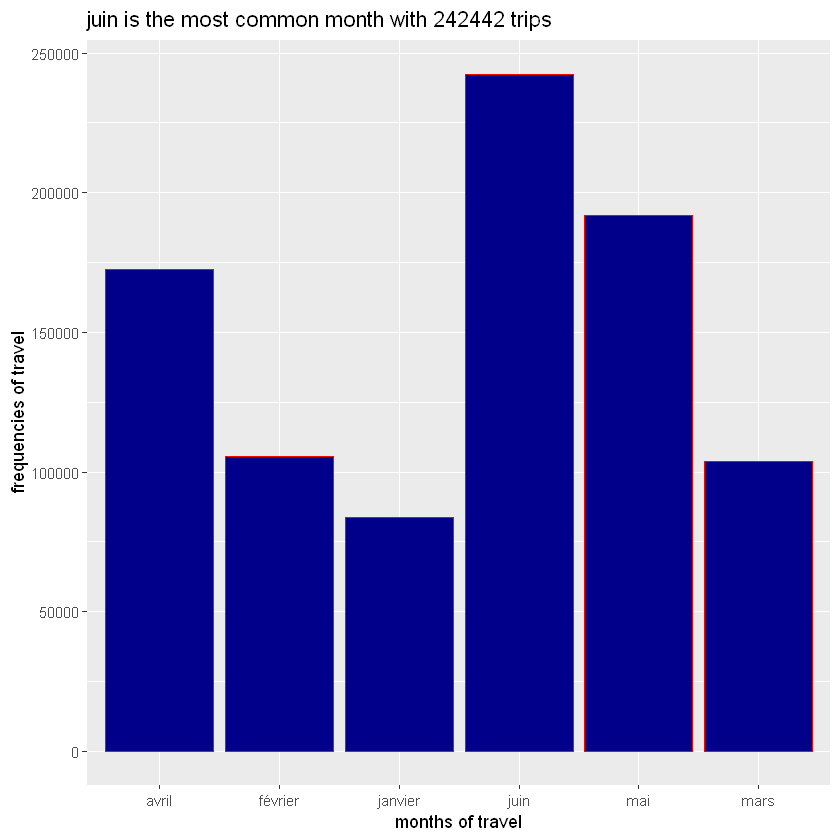

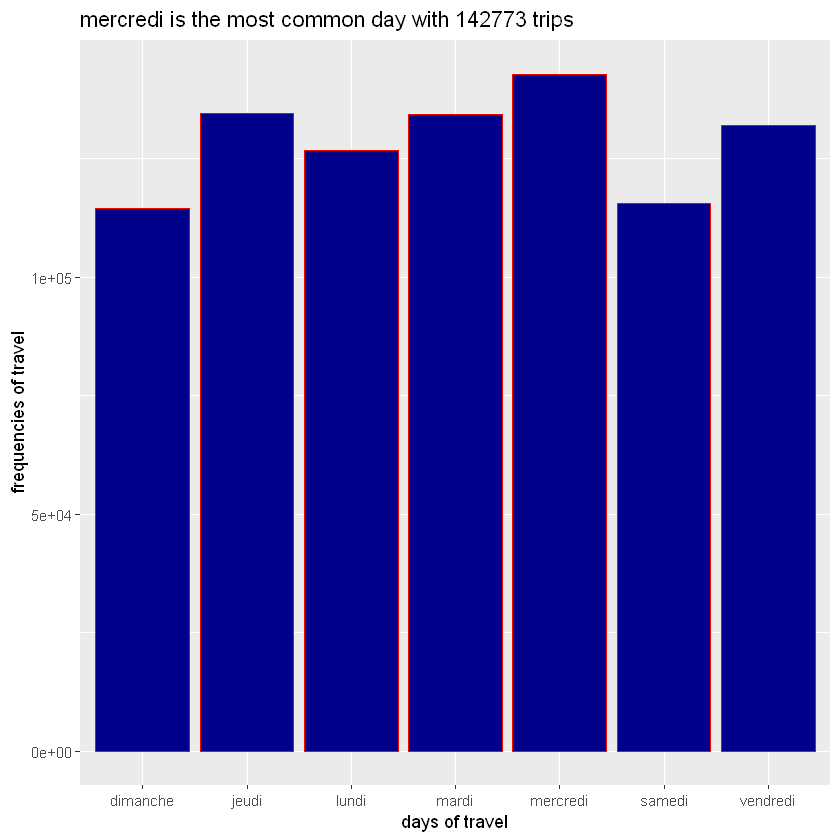

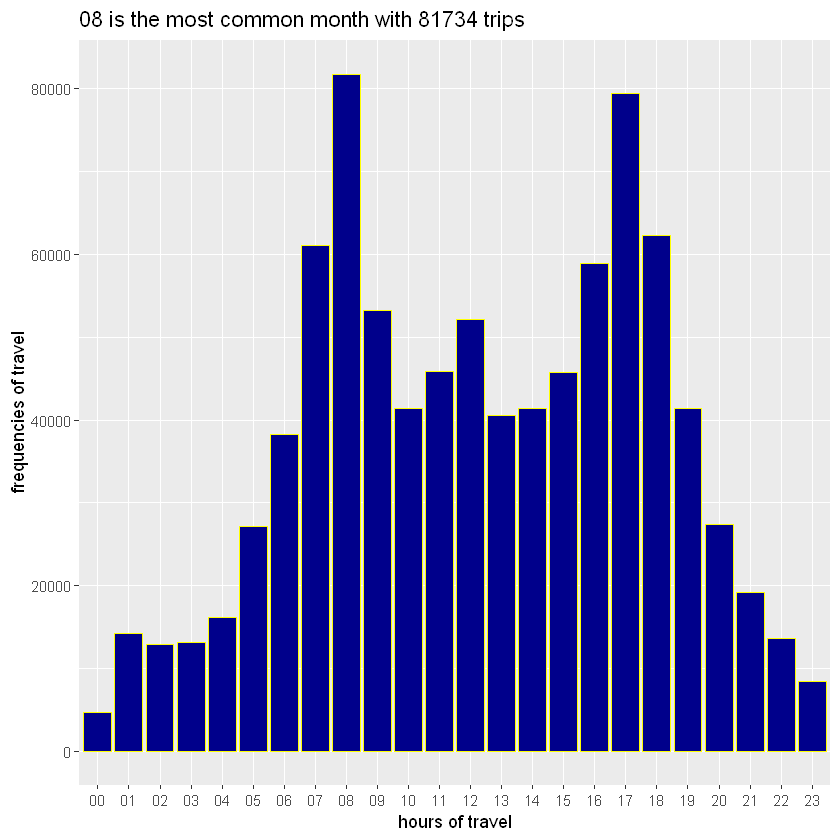

In [8]:
library(tidyverse)
getwd()
#Read and concatenate working data

ny <- read.csv('new_york_city.csv')
ny<- mutate(ny,city="New_York")

wash <- read.csv('washington.csv')
wash <- wash[which(nchar(as.character(wash$Start.Time)) != 0),]
wash<- mutate(wash,city="Washington")

chi <- read.csv('chicago.csv')
chi<- mutate(chi,city="Chicago")

mydata <- bind_rows(ny,wash,chi)

#Create colomns for month day and hour

mydata$Start.Time <- as.POSIXct(mydata$Start.Time,"%Y-%m-%d %H:%M:%S")

mydata <- mutate(mydata, month = format(`Start.Time`,"%B"))
mydata <- mutate(mydata, day = format(`Start.Time`,"%A"))
mydata <- mutate(mydata, hour = format(`Start.Time`,"%H"))

#the most common month, day, hour (Question#1)

# Most common month
common_month <- mydata %>% 
  group_by(month) %>% 
  summarize(nbr = n()) %>% 
  ungroup() %>% 
  arrange(desc(nbr)) %>%
  head(1)

str_common_month <- paste0(common_month$month[1],' is the most common month with ',common_month$nbr[1], ' trips')


### Bar plot for the frequencies of travel by months
ggplot(mydata) + geom_bar(aes(x = month), color= "red", fill="darkblue") +
  ggtitle(str_common_month) + labs(x="months of travel", y= "frequencies of travel")


# Most common day
common_day <- mydata %>% 
  group_by(day) %>% 
  summarize(nbr = n()) %>% 
  ungroup() %>% 
  arrange(desc(nbr)) %>%
  head(1)

str_common_day <- paste0(common_day$day[1],' is the most common day with ',common_day$nbr[1], ' trips')

### Bar plot for the frequencies of travel by days
ggplot(mydata) + geom_bar(aes(x = day), color= "red", fill="darkblue") +
  ggtitle(str_common_day) + labs(x="days of travel", y= "frequencies of travel")

# Most common hour
common_hour <- mydata %>% 
  group_by(hour) %>% 
  summarize(nbr = n()) %>% 
  ungroup() %>% 
  arrange(desc(nbr)) %>%
  head(1)


str_common_hour <- paste0(common_hour$hour[1],' is the most common month with ',common_hour$nbr[1], ' trips')

### Bar plot for the frequencies of travel by days
ggplot(mydata) + geom_bar(aes(x = hour), color= "yellow", fill="darkblue") +
  ggtitle(str_common_hour) + labs(x="hours of travel", y= "frequencies of travel")

In [3]:
#install.packages('tidyverse')

### Question 2


**##Popular stations and trip**

In [2]:
common_end_station <- mydata %>% 
  group_by(`End.Station`) %>% 
  summarize(nbr = n()) %>% 
  ungroup() %>% 
  filter(nbr == max(nbr))

print(paste0("«",common_end_station$End.Station[1],'» is the most common End Station'))


#the most the  most common trip (Question#2)

common_trip <- mydata %>%
  mutate(Trip = paste0(Start.Station, " - ",End.Station)) %>% 
  group_by(Trip) %>% 
  summarize(nbr = n()) %>%
  ungroup() %>% 
  filter(nbr == max(nbr))

print(paste0("«",common_trip$Trip[1],'» is the most common Trip with ',common_trip$nbr[1],' Trips'))

[1] "«Columbus Circle / Union Station» is the most common End Station"
[1] "«Jefferson Dr & 14th St SW - Jefferson Dr & 14th St SW» is the most common Trip with 198 Trips"


### Question 3

In [18]:

cities <- unique(mydata$city)

## the total travel time for users in different cities
print('Total travel time for users in different cities:')
tot_trvl_time <- mydata %>% group_by(city) %>% summarise(total_travel_time = sum(Trip.Duration, na.rm = TRUE)) %>% ungroup()

for(city in cities) {
  tmp_time <- tot_trvl_time$total_travel_time[which(tot_trvl_time$city == city)]
  print(paste0(city,' : ',tmp_time,' seconds'))
}

print('------------------------')

##the average travel time for users in different cities
print('Average travel time for users in different cities:')
avg_trvl_time <- mydata %>% group_by(city) %>% summarise(avg_travel_time = mean(Trip.Duration, na.rm = TRUE)) %>% ungroup()

for(city in cities) {
  tmp_time <- avg_trvl_time$avg_travel_time[which(avg_trvl_time$city == city)]
  print(paste0(city,' : ',tmp_time,' seconds'))
}

[1] "Total travel time for users in different cities:"
[1] "New_York : 49490073 seconds"
[1] "Washington : 109883544.668 seconds"
[1] "Chicago : 8087801 seconds"
[1] "------------------------"
[1] "Average travel time for users in different cities:"
[1] "New_York : 903.614690792237 seconds"
[1] "Washington : 1233.95333709152 seconds"
[1] "Chicago : 937.172769409038 seconds"


### Question 4


**#User info**

[1] "Counts of each user type:"
[1] "Subscriber : 121576"
[1] "Customer : 30754"
[1] " : 120"
[1] "------------------------"
[1] "Counts of gender for NYC:"
[1] " : 120"
[1] "Female : 30754"
[1] "Male : 121576"


Warning message:
“Removed 5218 rows containing non-finite values (stat_boxplot).”

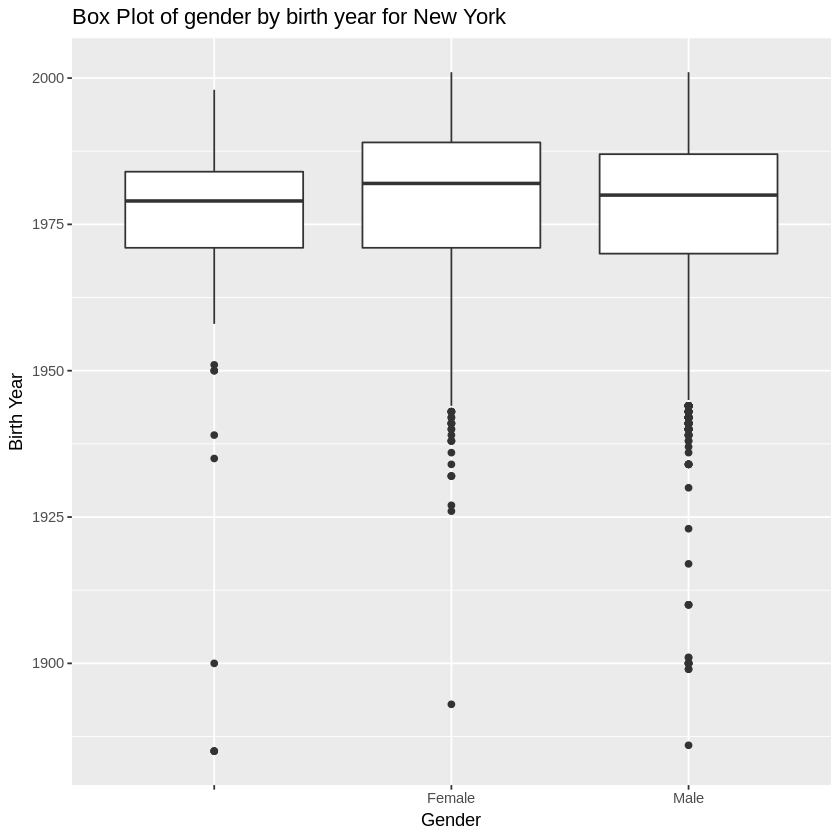

In [17]:

#the counts of each user type (Question#3)
print('Counts of each user type:')
usertype <- mydata %>% group_by(User.Type) %>% summarize(nbr = n()) %>% ungroup()

utypes <- unique(mydata$User.Type)
for(utype in utypes) {
  print(paste0(utype, ' : ',usertype$nbr[which(usertype$User.Type == utype)]))
}

print('------------------------')

#the counts of gender for NYC (Question#3)
print('Counts of gender for NYC:')
gendernewyork <- mydata %>% 
  filter(city == 'New_York') %>% 
  mutate(Gender = as.character(Gender)) %>% 
  mutate(Gender = ifelse(is.na(Gender),'',Gender)) %>%   
  group_by(Gender) %>% 
  summarize(nbr = n()) %>% 
  ungroup()

genders <- unique(gendernewyork$Gender)
for(gender in genders) {
  print(paste0(gender, ' : ',usertype$nbr[which(gendernewyork$Gender == gender)]))
}

### Box plot for gender New_York
mydata %>% filter(city == 'New_York' & !is.na(Gender)) %>% ggplot() + geom_boxplot(aes(x = Gender, y= Birth.Year)) +
  ggtitle("Box Plot of gender by birth year for New York") + labs(x="Gender", y= "Birth Year")



### answer 4

there is more males in New York than females in term of bikeshare


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')